In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of samples
k_max = 10000
t = np.linspace(0, k_max, k_max)  # Time variable

# Generate random inputs
u = 2 * np.random.uniform(-5, 5, k_max)

# Initialize y(k) array
y = np.zeros(k_max)

# Define y(k) calculations
for k in range(1, k_max):
    y[k] = 1 / (1 + (y[k-1])**2) + 0.25 * u[k] - 0.3 * u[k-1]

# Shift arrays for y(k-1), y(k-2), u(k-1), u(k-2)
y_k_1 = np.zeros(k_max)
y_k_2 = np.zeros(k_max)
u_k_1 = np.zeros(k_max)
u_k_2 = np.zeros(k_max)

y_k_1[1:] = y[:-1]
y_k_2[2:] = y[:-2]
u_k_1[1:] = u[:-1]
u_k_2[2:] = u[:-2]

In [3]:
t.shape, u.shape, y.shape, y_k_1.shape, y_k_2.shape, u_k_1.shape, u_k_2.shape

((10000,), (10000,), (10000,), (10000,), (10000,), (10000,), (10000,))

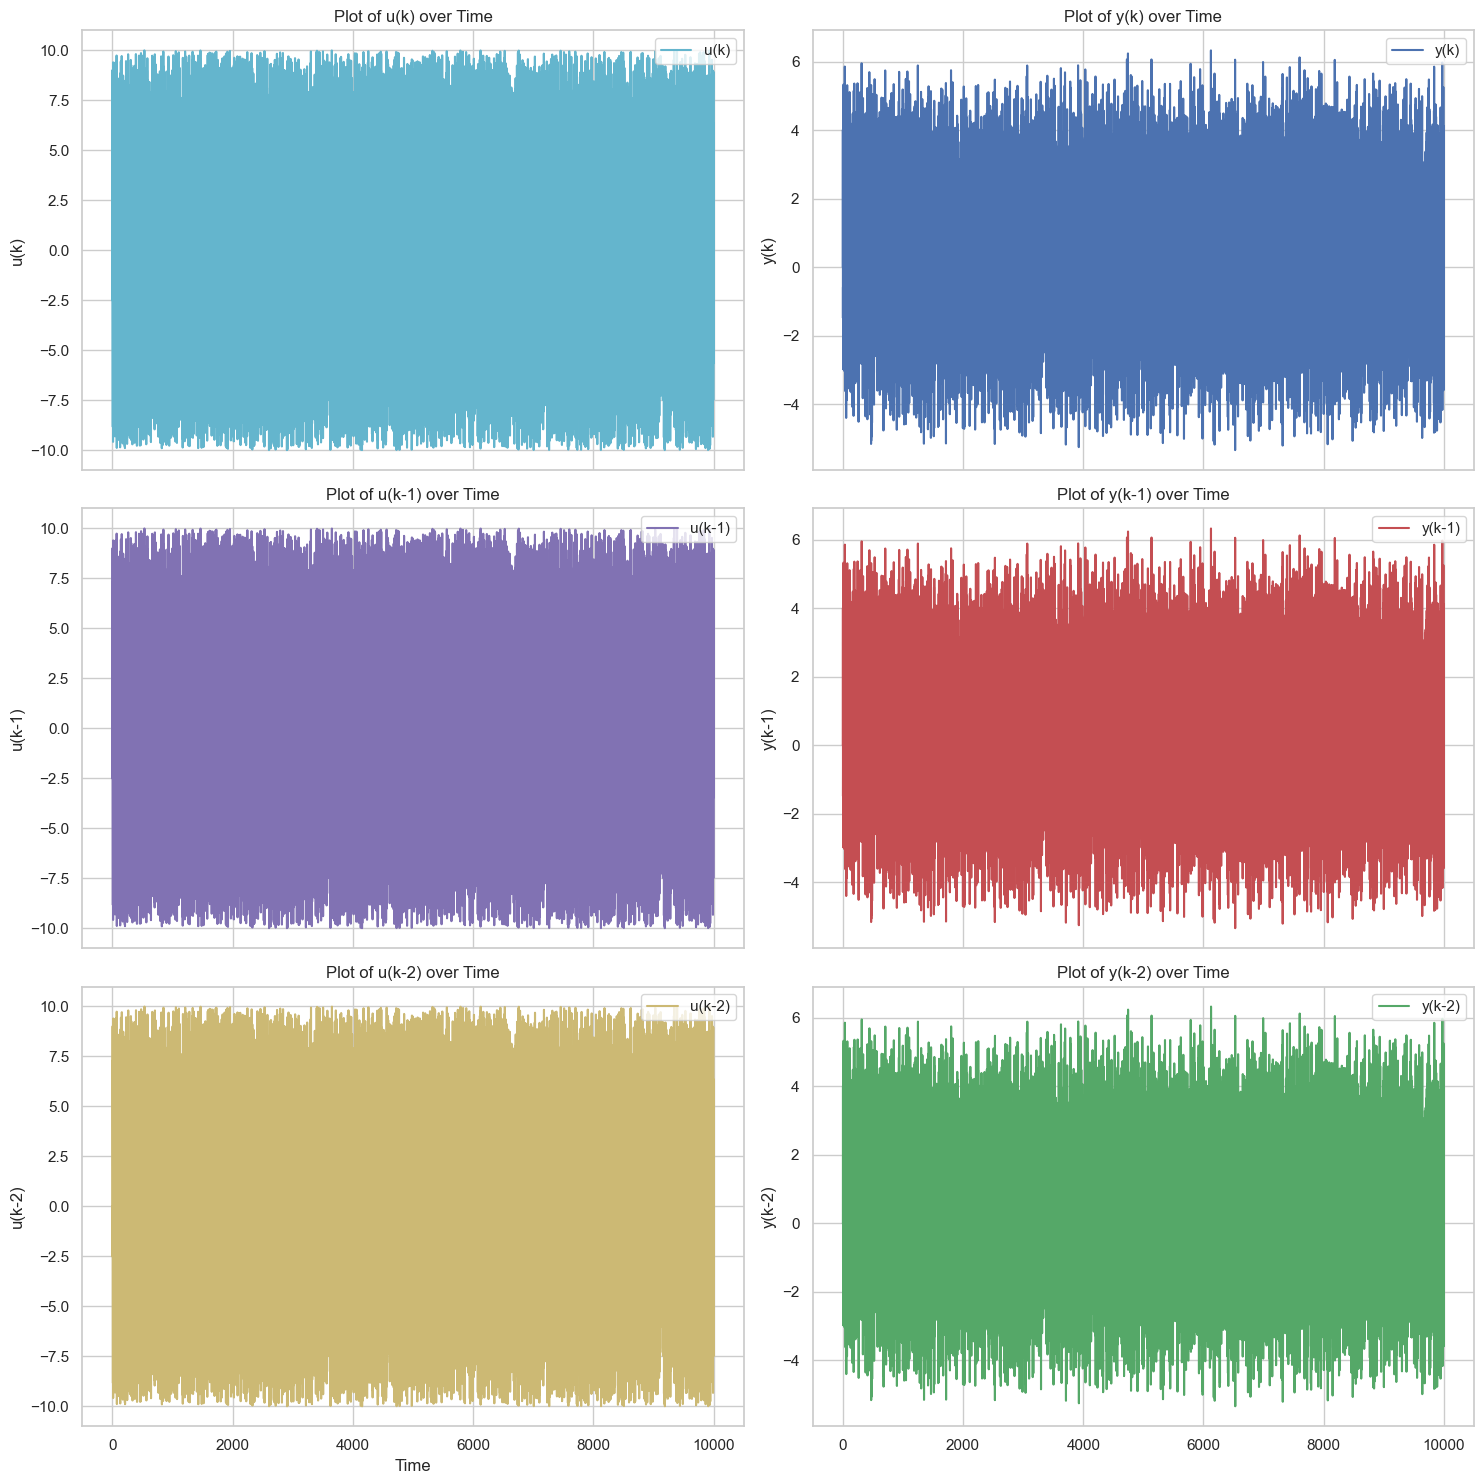

In [4]:
# Set up Seaborn style
sns.set_theme(style="whitegrid")

# Create a single figure with a 3x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15), sharex=True)

# Plot u(k) over time
ax[0, 0].plot(t, u, label='u(k)', color='c')
ax[0, 0].set_ylabel('u(k)')
ax[0, 0].set_title('Plot of u(k) over Time')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot y(k) over time
ax[0, 1].plot(t, y, label='y(k)', color='b')
ax[0, 1].set_ylabel('y(k)')
ax[0, 1].set_title('Plot of y(k) over Time')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot u(k-1) over time
ax[1, 0].plot(t, u_k_1, label='u(k-1)', color='m')
ax[1, 0].set_ylabel('u(k-1)')
ax[1, 0].set_title('Plot of u(k-1) over Time')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot y(k-1) over time
ax[1, 1].plot(t, y_k_1, label='y(k-1)', color='r')
ax[1, 1].set_ylabel('y(k-1)')
ax[1, 1].set_title('Plot of y(k-1) over Time')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Plot u(k-2) over time
ax[2, 0].plot(t, u_k_2, label='u(k-2)', color='y')
ax[2, 0].set_xlabel('Time')
ax[2, 0].set_ylabel('u(k-2)')
ax[2, 0].set_title('Plot of u(k-2) over Time')
ax[2, 0].legend()
ax[2, 0].grid(True)

# Plot y(k-2) over time
ax[2, 1].plot(t, y_k_2, label='y(k-2)', color='g')
ax[2, 1].set_ylabel('y(k-2)')
ax[2, 1].set_title('Plot of y(k-2) over Time')
ax[2, 1].legend()
ax[2, 1].grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()

In [5]:
X = np.column_stack((u, u_k_1, u_k_2, y_k_1, y_k_2))
y = y.reshape(-1, 1)
u = u.reshape(-1, 1)
u_k_1 = u_k_1.reshape(-1, 1)
u_k_2 = u_k_2.reshape(-1, 1)
y_k_1 = y_k_1.reshape(-1, 1)
y_k_2 = y_k_2.reshape(-1, 1)

In [6]:
input_scaler = MinMaxScaler(feature_range=(-1, 1))
input_scaler.fit(u.reshape(-1, 1))
output_scaler = MinMaxScaler(feature_range=(-1, 1))
output_scaler.fit(y.reshape(-1, 1))

MinMaxScaler(feature_range=(-1, 1))

In [7]:
u_norm = input_scaler.transform(u.reshape(-1, 1)).flatten()
y_norm = output_scaler.transform(y.reshape(-1, 1)).flatten()
u_k_1_norm = input_scaler.transform(u_k_1.reshape(-1, 1)).flatten()
u_k_2_norm = input_scaler.transform(u_k_2.reshape(-1, 1)).flatten()
y_k_1_norm = output_scaler.transform(y_k_1.reshape(-1, 1)).flatten()
y_k_2_norm = output_scaler.transform(y_k_2.reshape(-1, 1)).flatten()

In [8]:
# Define the arrays for each variable
X_norm = np.column_stack((u_norm, u_k_1_norm, u_k_2_norm, y_k_1_norm, y_k_2_norm))
y_norm = y_norm.reshape(-1, 1)
u_norm = u_norm.reshape(-1, 1)
u_k_1_norm = u_k_1_norm.reshape(-1, 1)
u_k_2_norm = u_k_2_norm.reshape(-1, 1)
y_k_1_norm = y_k_1_norm.reshape(-1, 1)
y_k_2_norm = y_k_2_norm.reshape(-1, 1)

In [9]:
X.shape, y.shape, u.shape, u_k_1.shape, u_k_2.shape, y_k_1.shape, y_k_2.shape

((10000, 5),
 (10000, 1),
 (10000, 1),
 (10000, 1),
 (10000, 1),
 (10000, 1),
 (10000, 1))

In [10]:
X_df = pd.DataFrame(X, columns=['u', 'u(k-1)', 'u(k-2)', 'y(k-1)', 'y(k-2)'])
y_df = pd.DataFrame(y, columns=['y'])
X_norm_df = pd.DataFrame(X_norm, columns=['u', 'u(k-1)', 'u(k-2)', 'y(k-1)', 'y(k-2)'])
y_norm_df = pd.DataFrame(y_norm, columns=['y'])
df = pd.concat([X_df, y_df], axis=1)
norm_df = pd.concat([X_norm_df, y_norm_df], axis=1)

In [11]:
df.describe()

,u,u(k-1),u(k-2),y(k-1),y(k-2),y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.116809,-0.116243,-0.116038,0.383105,0.383365,0.383038
std,5.752603,5.752336,5.752303,2.299250,2.299059,2.299271
min,-9.999767,-9.999767,-9.999767,-5.340716,-5.340716,-5.340716
25%,-5.073423,-5.072228,-5.072228,-1.265325,-1.264097,-1.265325
50%,-0.149428,-0.148955,-0.148128,0.392119,0.392119,0.392119
75%,4.800127,4.800127,4.800127,2.051329,2.051329,2.051329
max,9.994353,9.994353,9.994353,6.324696,6.324696,6.324696


In [12]:
norm_df.describe()

,u,u(k-1),u(k-2),y(k-1),y(k-2),y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.011414,-0.011357,-0.011336,-0.018668,-0.018623,-0.018680
std,0.575429,0.575403,0.575399,0.394200,0.394167,0.394203
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.507221,-0.507101,-0.507101,-0.301286,-0.301076,-0.301286
50%,-0.014676,-0.014629,-0.014546,-0.017123,-0.017123,-0.017123
75%,0.480425,0.480425,0.480425,0.267344,0.267344,0.267344
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Calculate the split index
split_index = int(0.8 * len(X_norm))

# Split the data
X_norm_train = X_norm[:split_index]
X_norm_val = X_norm[split_index:]
y_norm_train = y_norm[:split_index]
y_norm_val = y_norm[split_index:]

In [14]:
X_norm_train.shape, X_norm_val.shape, y_norm_train.shape, y_norm_val.shape

((8000, 5), (2000, 5), (8000, 1), (2000, 1))

In [15]:
X_norm_train_tensor = torch.tensor(X_norm_train, dtype=torch.float32)
y_norm_train_tensor = torch.tensor(y_norm_train, dtype=torch.float32)
X_norm_val_tensor = torch.tensor(X_norm_val, dtype=torch.float32)
y_norm_val_tensor = torch.tensor(y_norm_val, dtype=torch.float32)

In [16]:
train_dataset = TensorDataset(X_norm_train_tensor, y_norm_train_tensor)
val_dataset = TensorDataset(X_norm_val_tensor, y_norm_val_tensor)

In [17]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [18]:
# Define the Neural Network Model
class PlantModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(PlantModel, self).__init__()
        layers = []
        in_size = input_size
        for h_size in hidden_sizes:
            layers.append(nn.Linear(in_size, h_size))
            layers.append(nn.ReLU())
            in_size = h_size
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

In [19]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [22]:
# Initialize the model
input_size = X_norm_train.shape[1]  # Number of input features
hidden_sizes = [64, 32]             # Example hidden layer sizes
output_size = 1                     # Predicting a single output y(k)

model = PlantModel(input_size, hidden_sizes, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

In [23]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item() * inputs.size(0)
    
    epoch_val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_train_loss:.6f} - Validation Loss: {epoch_val_loss:.6f}")

Epoch 1/100 - Training Loss: 0.024163 - Validation Loss: 0.001420
Epoch 2/100 - Training Loss: 0.000988 - Validation Loss: 0.000674
Epoch 3/100 - Training Loss: 0.000485 - Validation Loss: 0.000390
Epoch 4/100 - Training Loss: 0.000292 - Validation Loss: 0.000244
Epoch 5/100 - Training Loss: 0.000211 - Validation Loss: 0.000186
Epoch 6/100 - Training Loss: 0.000168 - Validation Loss: 0.000157
Epoch 7/100 - Training Loss: 0.000143 - Validation Loss: 0.000140
Epoch 8/100 - Training Loss: 0.000126 - Validation Loss: 0.000126
Epoch 9/100 - Training Loss: 0.000112 - Validation Loss: 0.000124
Epoch 10/100 - Training Loss: 0.000100 - Validation Loss: 0.000113
Epoch 11/100 - Training Loss: 0.000090 - Validation Loss: 0.000100
Epoch 12/100 - Training Loss: 0.000082 - Validation Loss: 0.000087
Epoch 13/100 - Training Loss: 0.000077 - Validation Loss: 0.000074
Epoch 14/100 - Training Loss: 0.000071 - Validation Loss: 0.000066
Epoch 15/100 - Training Loss: 0.000066 - Validation Loss: 0.000059
Epoc

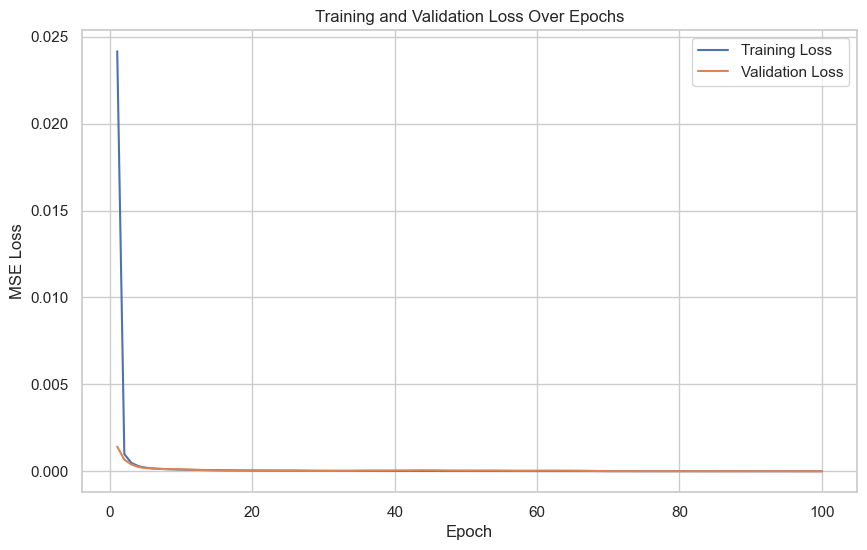

In [24]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Model is on device: cpu
Inputs are on device: cpu


AttributeError: 'numpy.ndarray' object has no attribute 'append'